Libraries

In [24]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.io as pio
pio.renderers.default = "svg"
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sb
     

In [25]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

DATASET

In [26]:

df = pd.read_csv('purity_air.csv')
data2= pd.read_csv('purity_air.csv')
df.head()


,state,status,AQI-US,PM2.5,PM10,Temp,Humid,EV
0,Andhra Pradesh,GOOD,39,10,31,32,67,54000
1,Arunachal Pradesh,MODERATE,64,19,28,29,78,20
2,Assam,MODERATE,74,14,83,28,89,64766
3,Bihar,MODERATE,84,25,45,62,87,83335
4,Chandigarh,MODERATE,64,18,35,29,75,2812


In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   37 non-null     object
 1   status  37 non-null     object
 2   AQI-US  37 non-null     int64 
 3   PM2.5   37 non-null     int64 
 4   PM10    37 non-null     int64 
 5   Temp    37 non-null     int64 
 6   Humid   37 non-null     int64 
 7   EV      37 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.4+ KB


,AQI-US,PM2.5,PM10,Temp,Humid,EV
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,59.189189,16.432432,54.027027,28.054054,79.567568,40066.108108
std,22.958704,7.865327,91.628321,7.637430,9.526398,64122.809794
min,4.000000,2.000000,4.000000,4.000000,55.000000,20.000000
25%,44.000000,10.000000,28.000000,26.000000,76.000000,162.000000
50%,64.000000,18.000000,39.000000,28.000000,81.000000,16811.000000
75%,74.000000,23.000000,47.000000,30.000000,86.000000,48767.000000
max,108.000000,34.000000,584.000000,62.000000,95.000000,337180.000000


Analysis of the dataset

In [28]:
df.isnull().sum()

state     0
status    0
AQI-US    0
PM2.5     0
PM10      0
Temp      0
Humid     0
EV        0
dtype: int64

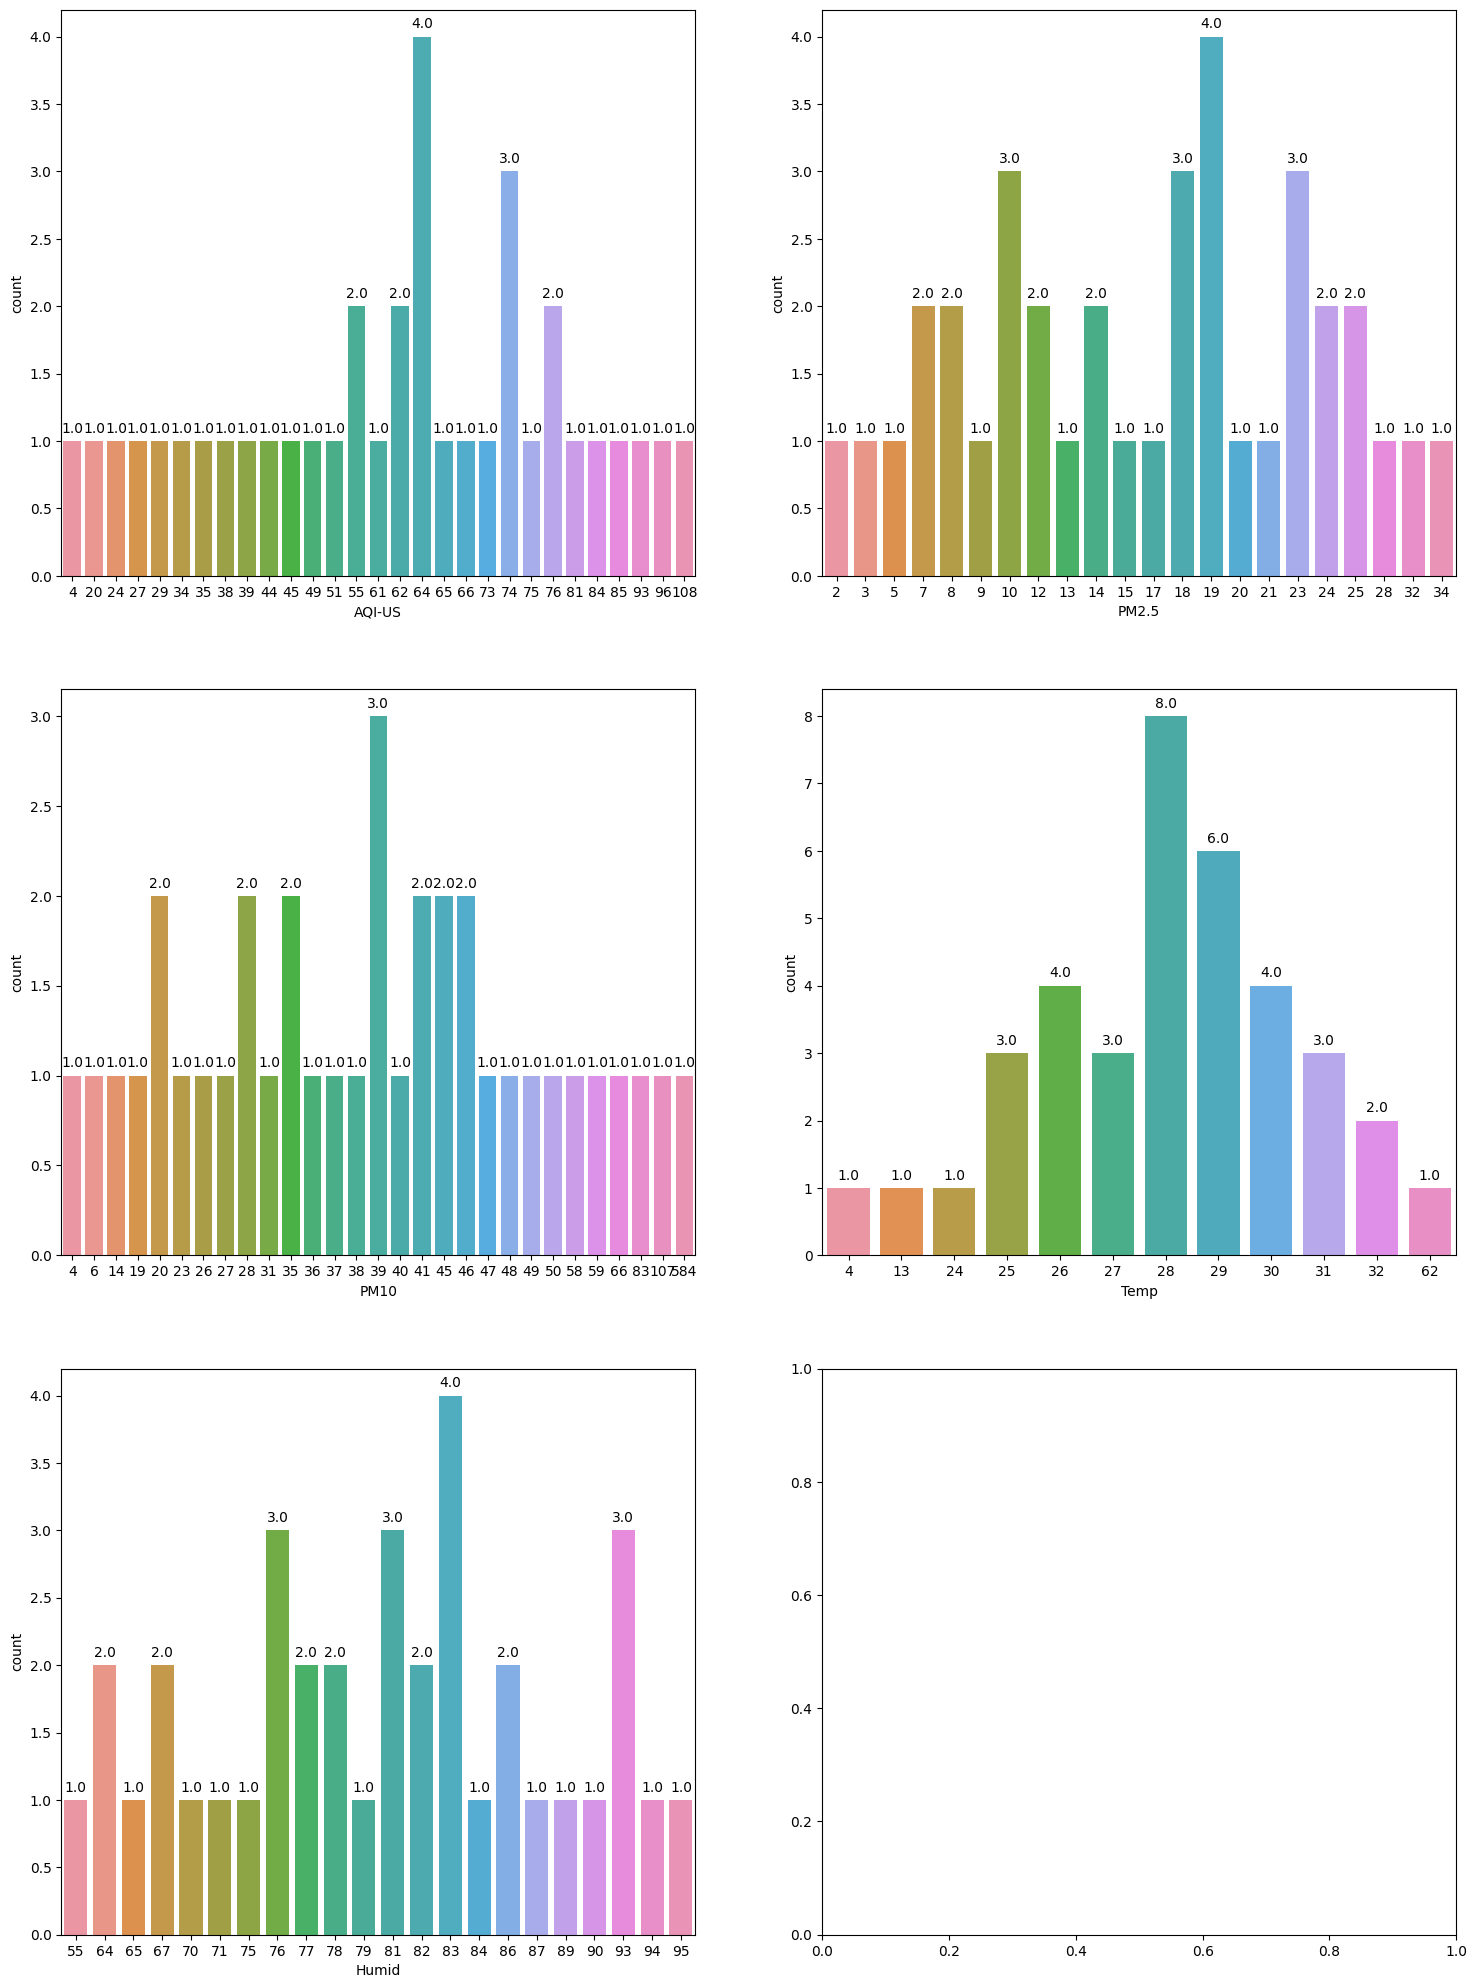

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 25))
columns = ['AQI-US', 'PM2.5', 'PM10', 'Temp', 'Humid']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    splot = sns.countplot(data=df, x=column, ax=axes[row][col])
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points')


Conclusion

The air quality and other factors that might influence the success of selling electric vehicles vary from state to state in India. This variation provides opportunities to tailor the marketing and sales of electric vehicles to the specific conditions and needs of each state. As such, India presents a diverse and dynamic market for the sale of electric vehicles

In [30]:
corr_matrix = df.corr()
#to get each and every correlation of variables
print(corr_matrix)

          AQI-US     PM2.5      PM10      Temp     Humid        EV
AQI-US  1.000000  0.904808  0.489737  0.406598  0.376447  0.026894
PM2.5   0.904808  1.000000  0.227544  0.355199  0.236863  0.057022
PM10    0.489737  0.227544  1.000000  0.054418  0.316683 -0.085951
Temp    0.406598  0.355199  0.054418  1.000000  0.085469  0.231317
Humid   0.376447  0.236863  0.316683  0.085469  1.000000 -0.135804
EV      0.026894  0.057022 -0.085951  0.231317 -0.135804  1.000000


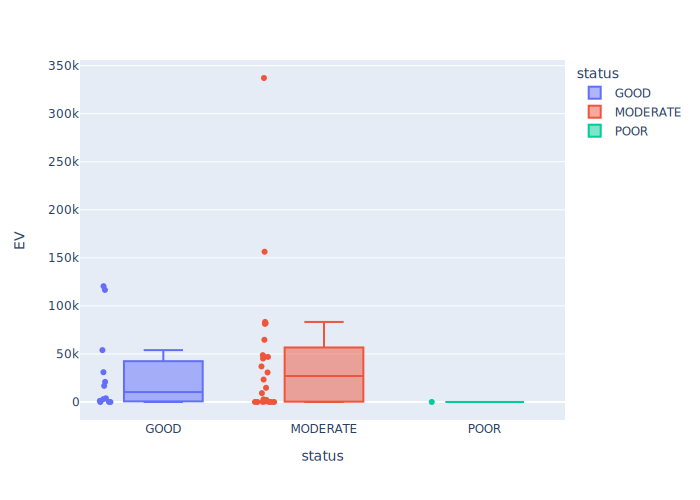

In [31]:
fig = px.box(df,x='status',y = 'EV',color = 'status',points='all')
pio.show(fig)

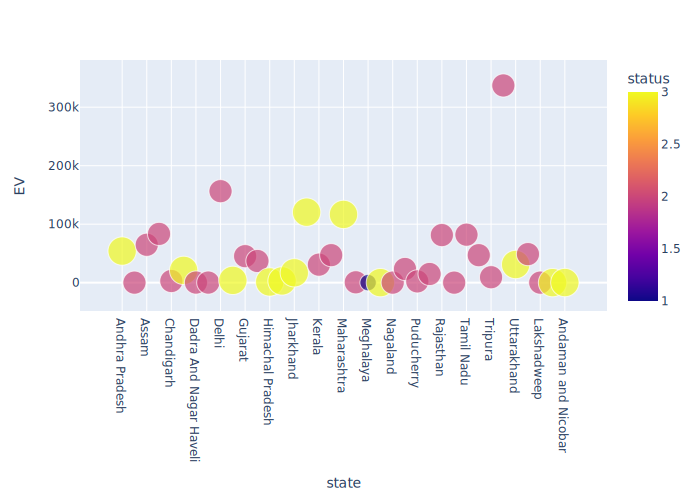

In [32]:
df['status']=df['status'].replace({'GOOD':3,'POOR':1,'MODERATE':2})
fig = px.scatter(df,x = 'state',y = 'EV',size='status',color = 'status',hover_data=['status','EV'])
pio.show(fig)

Pairplot of all the columns based on Rapid Charger presence

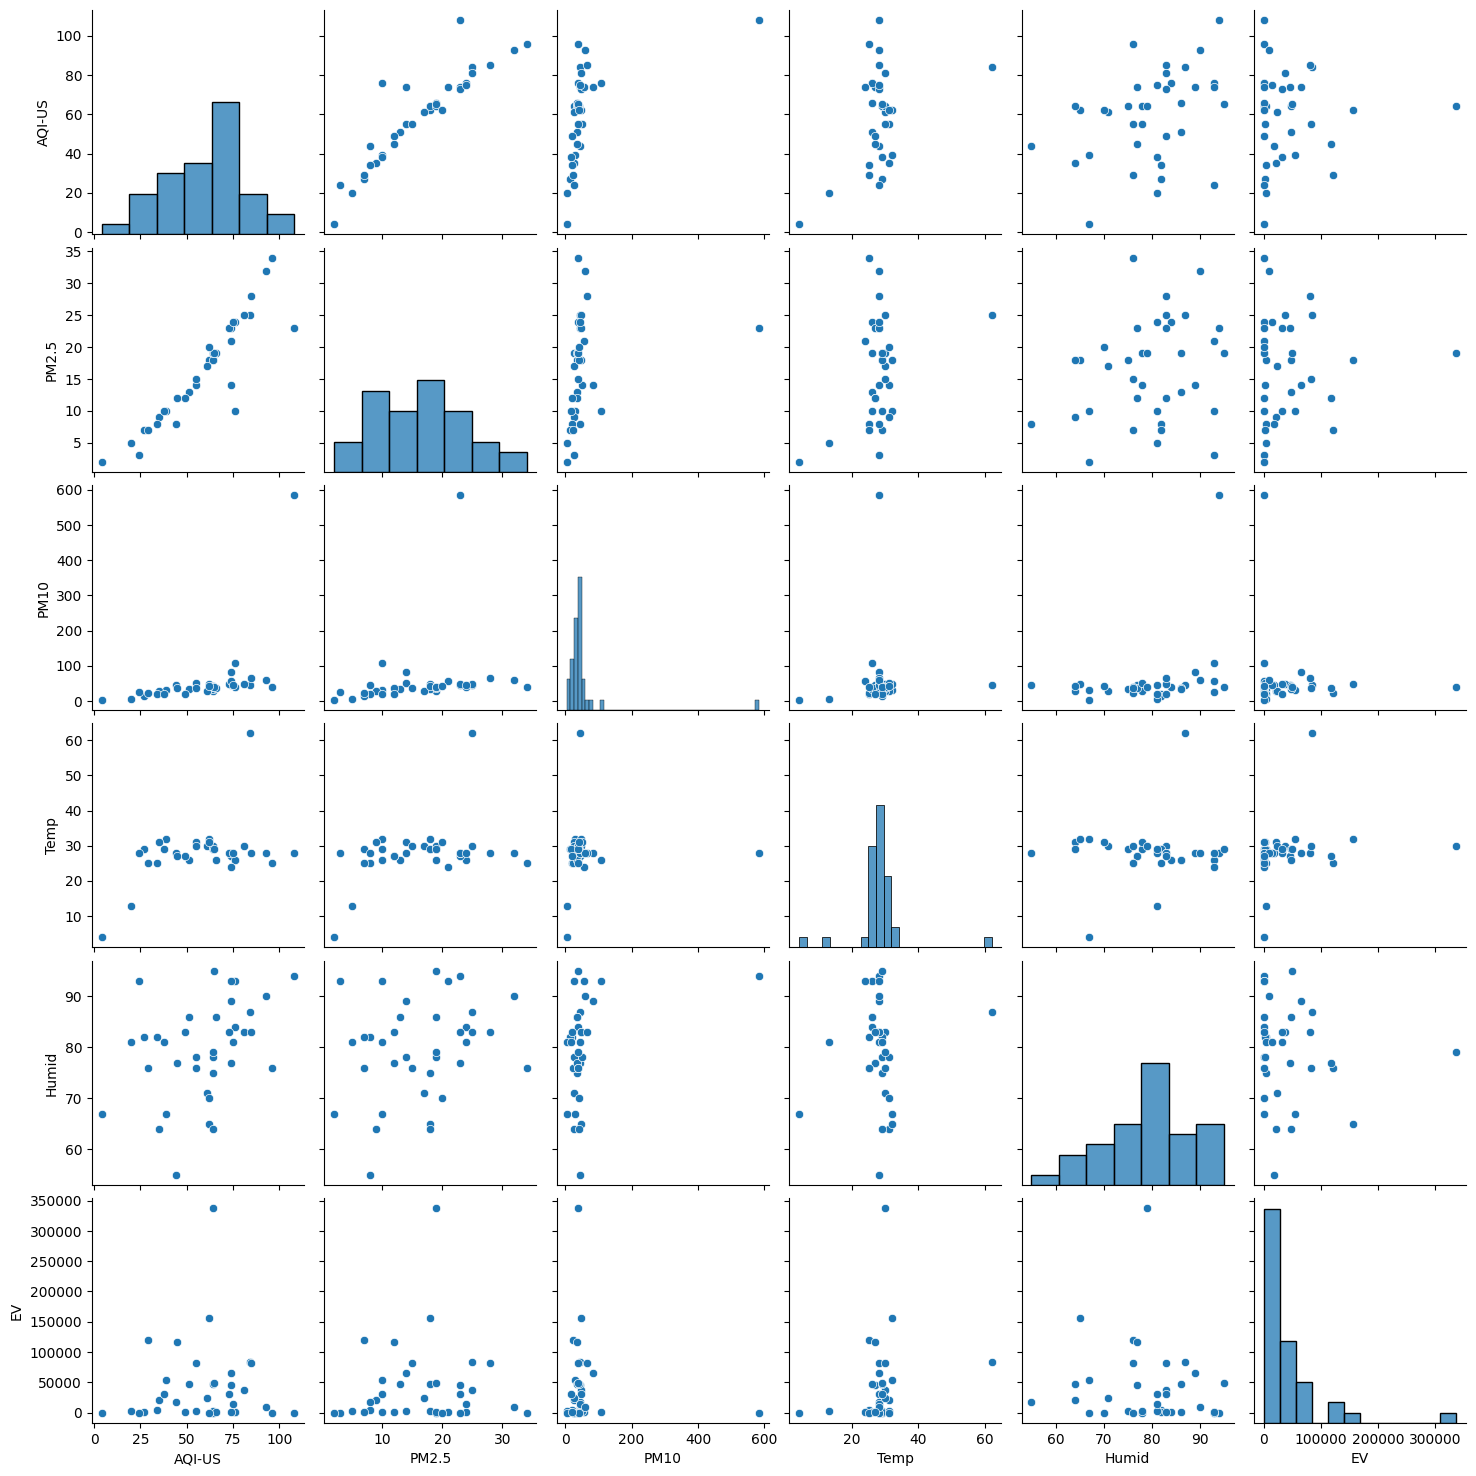

In [33]:
df.isnull().sum() #missing values ..... no missing values
# provides all the data relationship between each variable
sns.pairplot(df[['AQI-US', 'PM2.5', 'PM10', 'Temp', 'Humid',"EV"]])
plt.show()

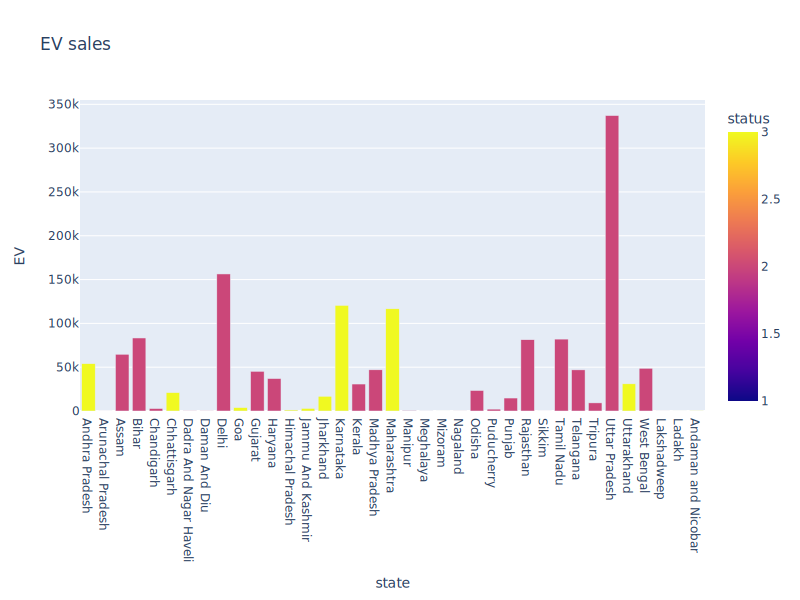

In [34]:
fig = px.bar(df,x='state',y = 'EV',color = 'status',title = 'EV sales',labels = {'x':'State','y':'sales'})
fig.update_layout(width=800, height=600)
pio.show(fig)

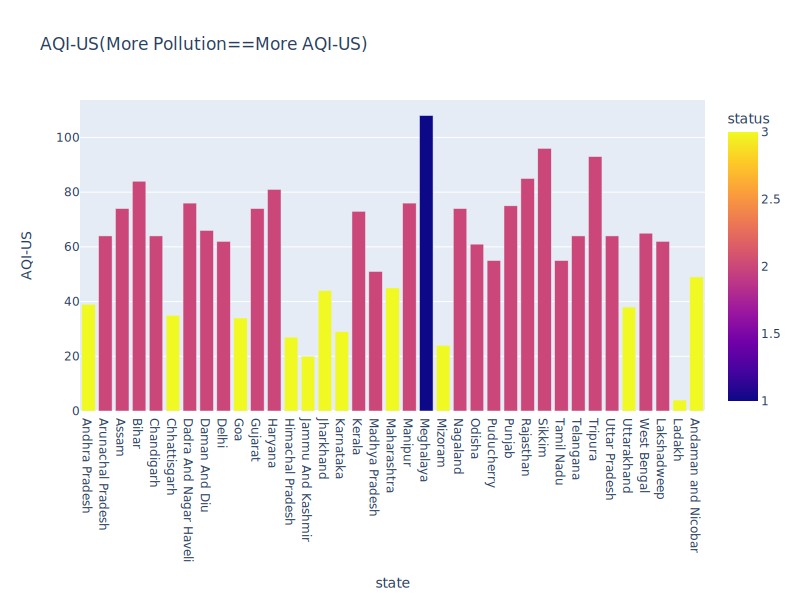

In [35]:
fig = px.bar(df,x='state',y = 'AQI-US',color = 'status',title = 'AQI-US(More Pollution==More AQI-US)',labels = {'x':'State','y':'AQS-US'})
fig.update_layout(width=800, height=600)
pio.show(fig)

<Axes: title={'center': 'Sales'}, xlabel='No. of Samples', ylabel='Sales'>

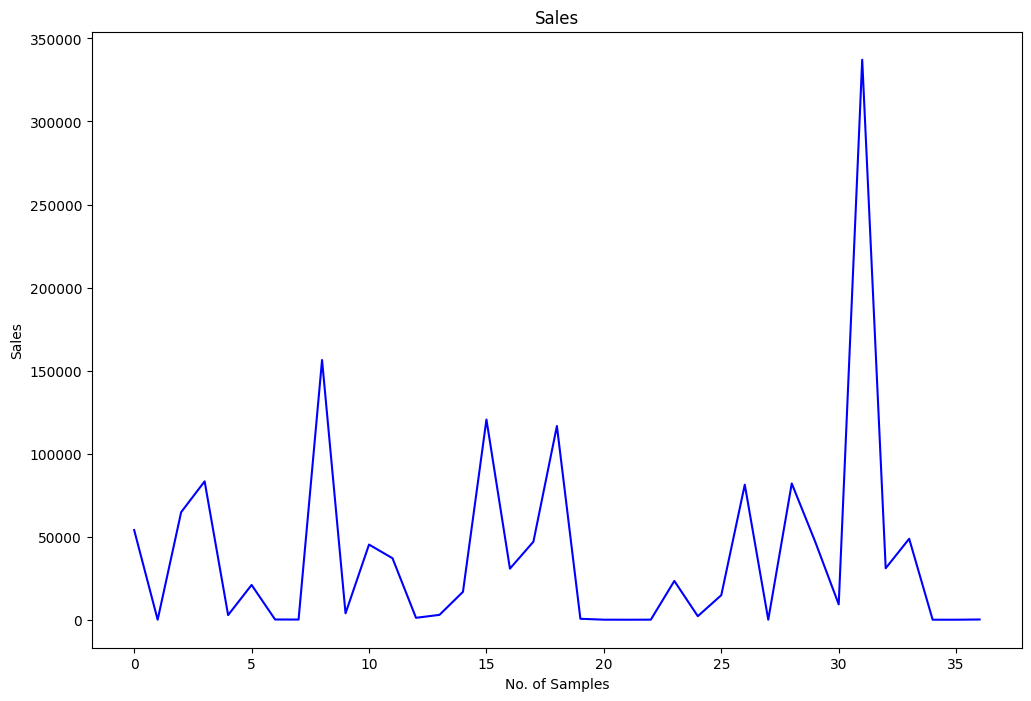

In [36]:
df['EV'].plot(figsize = (12,8),title='Sales',xlabel = 'No. of Samples',ylabel = 'Sales',color = 'blue')

Heatmap to show the correlation of the data

<Axes: >

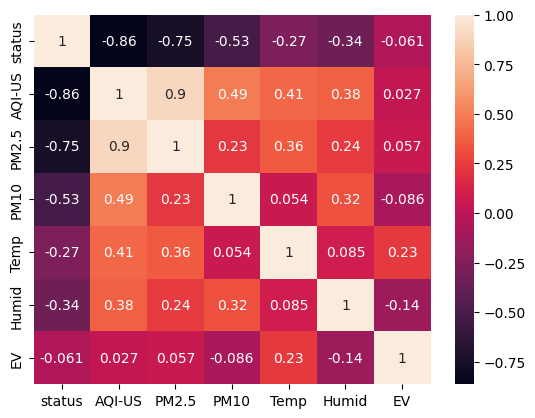

In [37]:
sns.heatmap(df.corr(),annot=True)

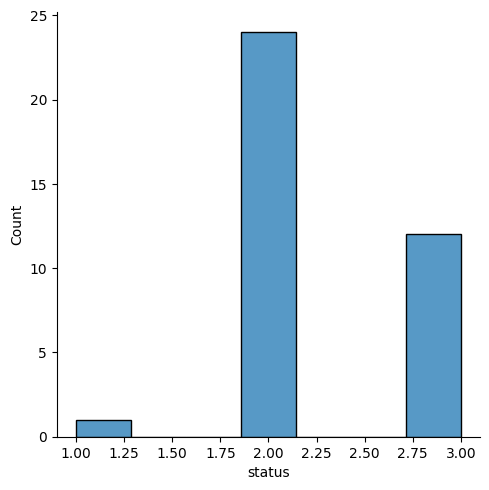

In [38]:
sns.displot(x=df["status"])



Making Some Comparisions for our dataset

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra And Nagar Haveli'),
  Text(7, 0, 'Daman And Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu And Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Madhya Pradesh'),
  Text(18, 0, 'Maharashtra'),
  Text(19, 0, 'Manipur'),
  Text(20, 0, 'Meghalaya'),
  Text(21, 0, 'Mizoram'),
  Text(22, 0, 'Nagaland'),
  Text(23, 0, 'Odisha'),
  Text(24, 0, 'Puducherry'),
  Text(25, 0, 'Punjab'),
  Text(26, 0, 'Rajasthan'),
  Text(27, 0, 'Sikkim'),
  Text(28, 0, 'Tamil Nadu'),
  Tex

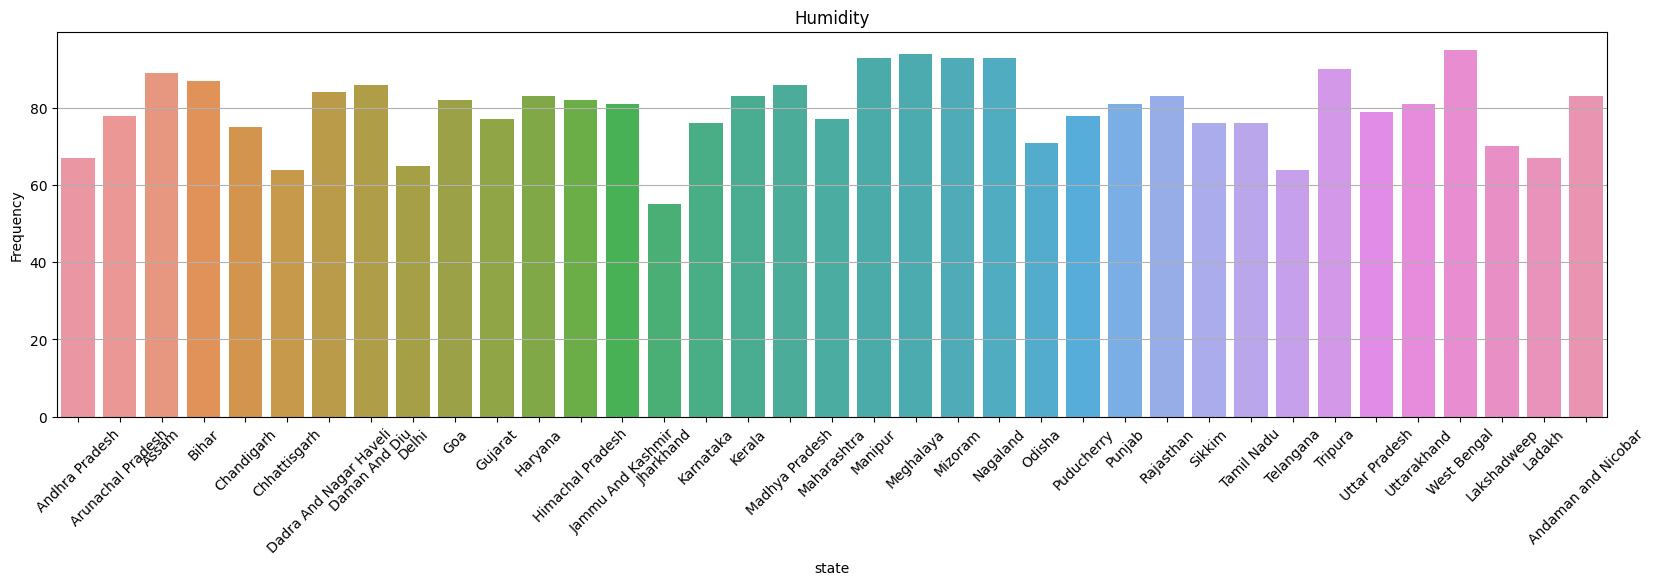

In [39]:

ax= plt.figure(figsize=(20,5))
sb.barplot(x='state',y="Humid",data=df)
plt.grid(axis='y')
plt.title('Humidity')
plt.xlabel('state')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra And Nagar Haveli'),
  Text(7, 0, 'Daman And Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu And Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Madhya Pradesh'),
  Text(18, 0, 'Maharashtra'),
  Text(19, 0, 'Manipur'),
  Text(20, 0, 'Meghalaya'),
  Text(21, 0, 'Mizoram'),
  Text(22, 0, 'Nagaland'),
  Text(23, 0, 'Odisha'),
  Text(24, 0, 'Puducherry'),
  Text(25, 0, 'Punjab'),
  Text(26, 0, 'Rajasthan'),
  Text(27, 0, 'Sikkim'),
  Text(28, 0, 'Tamil Nadu'),
  Tex

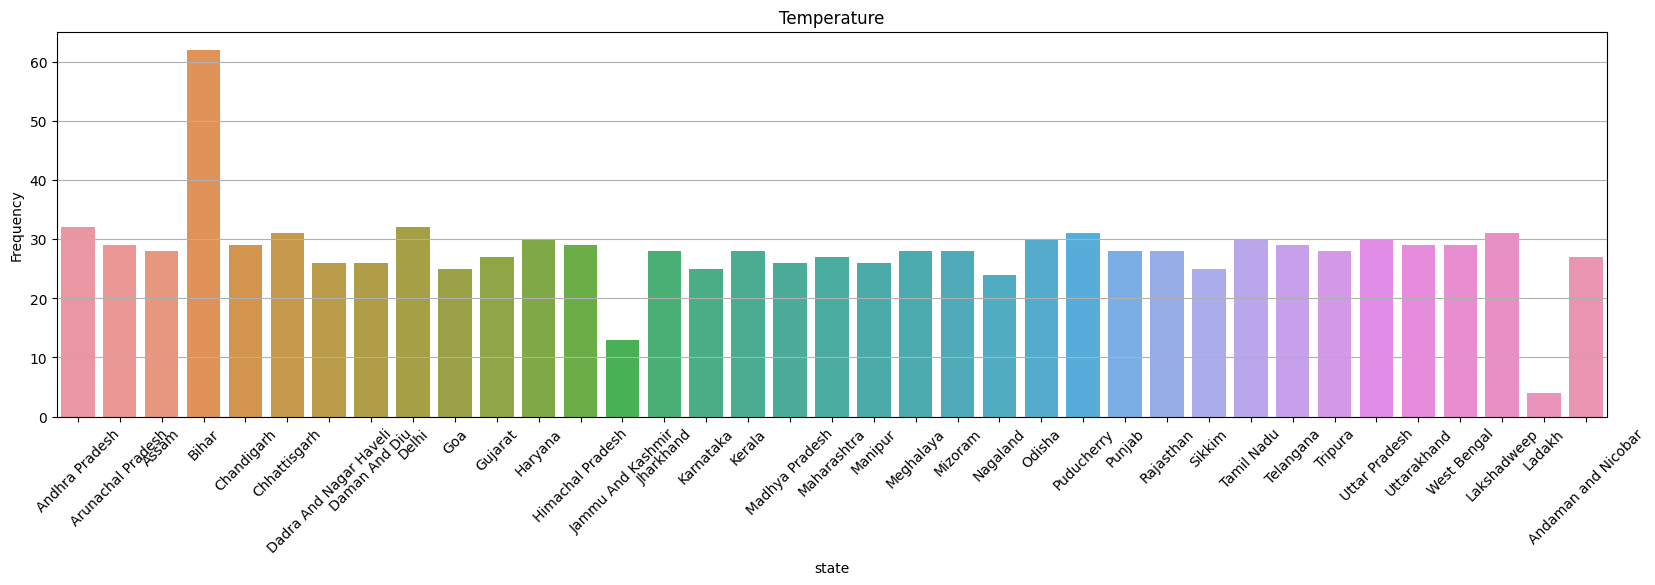

In [40]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='state',y="Temp",data=df)
plt.grid(axis='y')
plt.title('Temperature')
plt.xlabel('state')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra And Nagar Haveli'),
  Text(7, 0, 'Daman And Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu And Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Madhya Pradesh'),
  Text(18, 0, 'Maharashtra'),
  Text(19, 0, 'Manipur'),
  Text(20, 0, 'Meghalaya'),
  Text(21, 0, 'Mizoram'),
  Text(22, 0, 'Nagaland'),
  Text(23, 0, 'Odisha'),
  Text(24, 0, 'Puducherry'),
  Text(25, 0, 'Punjab'),
  Text(26, 0, 'Rajasthan'),
  Text(27, 0, 'Sikkim'),
  Text(28, 0, 'Tamil Nadu'),
  Tex

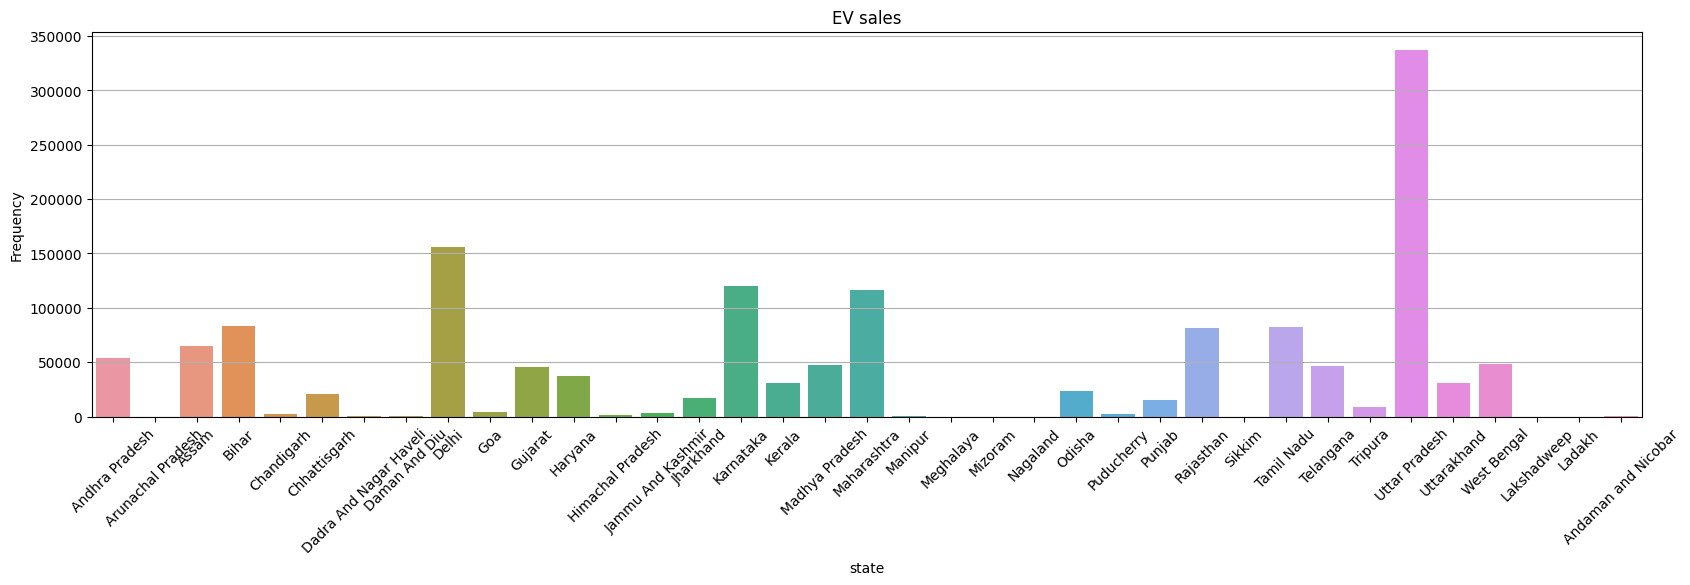

In [41]:
ax= plt.figure(figsize=(20,5))
sb.barplot(x='state',y="EV",data=df)
plt.grid(axis='y')
plt.title('EV sales')
plt.xlabel('state')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

------------------------------------------------------------------------------------------------------------------------------------------------------------

Checking the models that fit this dataset

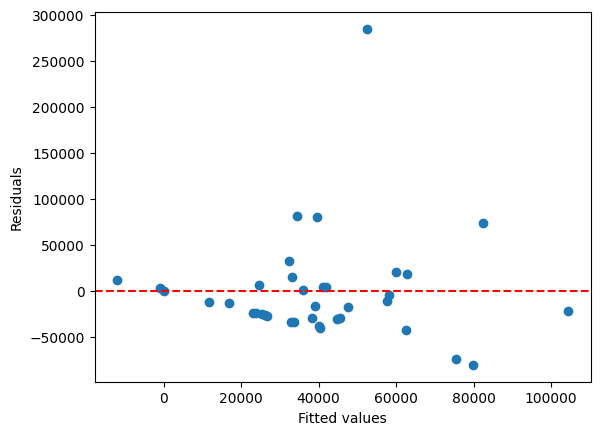

In [42]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a CSV file named 'data.csv'
data = df

# Define the independent variables (all columns except 'state' and 'EV')
X = data.drop(['state', 'EV'], axis=1)

# One-hot encode the categorical variable 'status'
X = pd.get_dummies(X, columns=['status'], drop_first=True)

# Define the dependent variable
y = data['EV']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X).fit()


# Create a residual plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Perform cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model_cv = sm.OLS(y_train, X_train).fit()
y_pred = model_cv.predict(X_test)

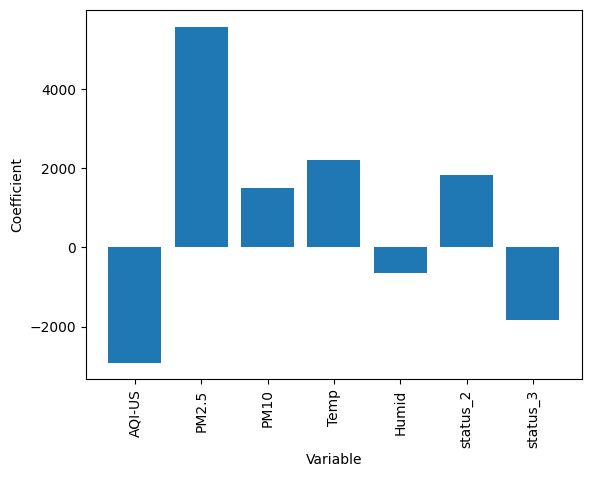

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Assuming your data is stored in a CSV file named 'data.csv'
data =df

# Define the independent variables (all columns except 'state' and 'EV')
X = data.drop(['state', 'EV'], axis=1)

# One-hot encode the categorical variable 'status'
X = pd.get_dummies(X, columns=['status'], drop_first=True)

# Define the dependent variable
y = data['EV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the Ridge regression model
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Create a coefficient plot
plt.bar(X.columns, model.coef_)
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.show()


Fitting the Model and calculating the accuracy

Logistic Regression

In [44]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the data into a DataFrame
data = data2

# Define the independent variables
X = data[['AQI-US','Temp','Humid','PM2.5','PM10']]

# Define the dependent variable as binary by thresholding at the median value
threshold = data['EV'].median()
y = (data['EV'] > threshold).astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data and calculate the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {accuracy:.2f}')
# Display the feature importances
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f'{feature}: {coef:.2f}')



Test accuracy: 0.50
AQI-US: -0.03
Temp: 0.37
Humid: -0.01
PM2.5: 0.04
PM10: 0.02


Well Temp acts as a important variable for predicting the target variable in each state

DECISION TREE REGRESSION

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Define the independent and dependent variables
X = data[['AQI-US','Temp','Humid','PM2.5','PM10']]
y = data['EV']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model on the training data
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'R-squared: {r2:.2f}')

# Display the feature importances
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f'{feature}: {importance:.2f}')

R-squared: 0.28
AQI-US: 0.04
Temp: 0.37
Humid: 0.13
PM2.5: 0.15
PM10: 0.30


Well This proves AQI-US and PM2.5 variables have lower importance values, indicating that they are less important in predicting the target variable.

STEP-2

In [46]:
columns = df.columns[2:7]
values = df[columns].values
pca = PCA()
pca.fit_transform(values)

for column, std, var, cum_var in zip(columns, pca.components_.std(axis=0), pca.explained_variance_ratio_, pca.explained_variance_ratio_.cumsum()):
    print(f"column: {column} \nStandard Deviation: {std} \nProportion of Variance: {var} \nCumulative Proportion: {cum_var} \n")

column: AQI-US 
Standard Deviation: 0.43675242296365835 
Proportion of Variance: 0.9352363102730776 
Cumulative Proportion: 0.9352363102730776 

column: PM2.5 
Standard Deviation: 0.3649372331678339 
Proportion of Variance: 0.050746384036431925 
Cumulative Proportion: 0.9859826943095096 

column: PM10 
Standard Deviation: 0.38585531597439643 
Proportion of Variance: 0.008313034396249629 
Cumulative Proportion: 0.9942957287057592 

column: Temp 
Standard Deviation: 0.41340489861143087 
Proportion of Variance: 0.0050566467453632856 
Cumulative Proportion: 0.9993523754511225 

column: Humid 
Standard Deviation: 0.3953229082933994 
Proportion of Variance: 0.0006476245488773425 
Cumulative Proportion: 0.9999999999999999 



Factor loadings are coefficients that show how original variables combine to form principal components. They help interpret the meaning of principal components in the context of the data.

In [47]:
df2=pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(columns))], index=columns)
df2

,PC1,PC2,PC3,PC4,PC5
AQI-US,0.128209,-0.910931,0.077753,-0.135509,0.359664
PM2.5,0.021717,-0.331715,0.095524,-0.152150,-0.925861
PM10,0.990920,0.130267,0.020596,0.011919,-0.023263
Temp,0.005605,-0.167403,0.127700,0.973712,-0.086730
Humid,0.033709,-0.123189,-0.983920,0.101144,-0.073209


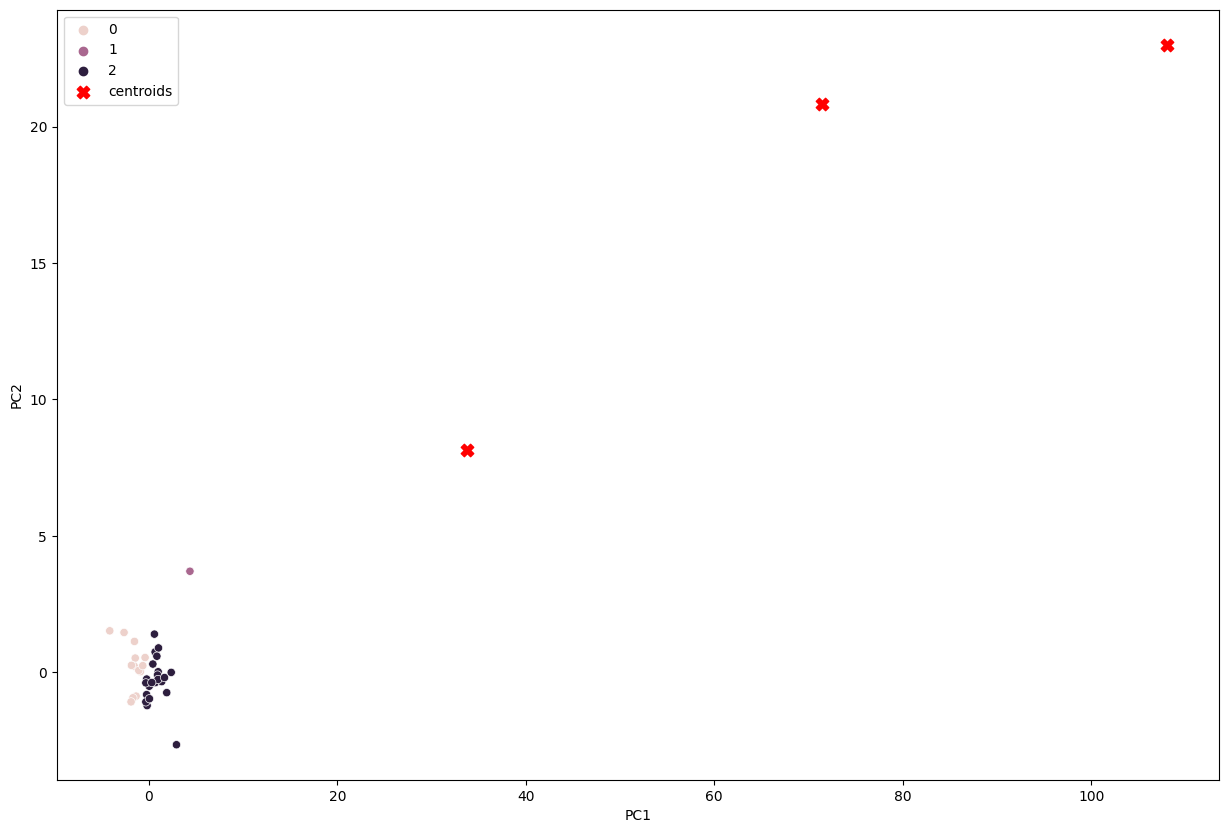

In [48]:
plt.figure(figsize=(15, 10))
kmeans = KMeans(3, random_state=0).fit(values)
scaled_data = StandardScaler().fit_transform(values)
pca = PCA(n_components=5)
pca_data = pca.fit_transform(scaled_data)

pf = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca.n_components)])
sns.scatterplot(data=pf, x='PC1', y='PC2', hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', c="r", s=80, label='centroids')
plt.legend()
plt.show()


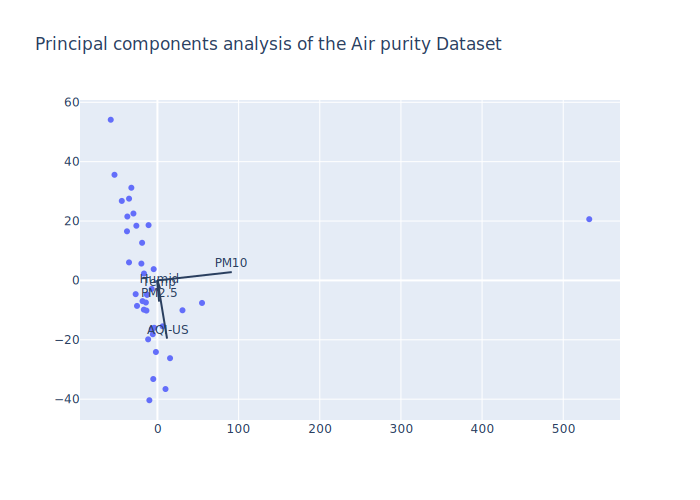

In [49]:
import plotly.graph_objs as go

pca = PCA()
components = pca.fit_transform(values)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=components[:, 0], y=components[:, 1], mode='markers'))
fig.update_layout(title='Principal components analysis of the Air purity Dataset')

for loading, feature in zip(loadings, columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loading[0],
        y1=loading[1]
    )
    fig.add_annotation(
        x=loading[0],
        y=loading[1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()



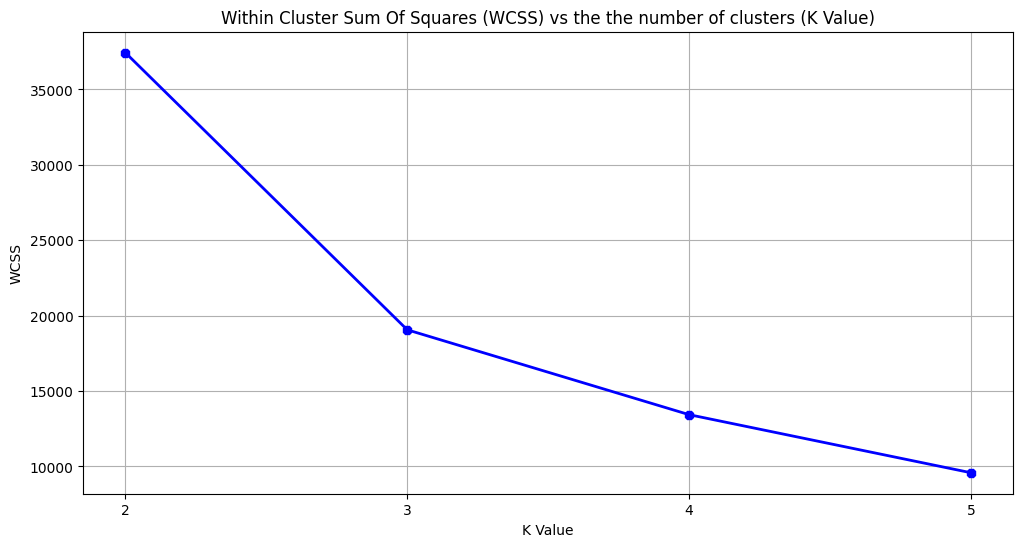

In [50]:
wcss = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(2, 6), wcss, linewidth=2, color="blue", marker="8")
plt.xlabel("K Value")
plt.xticks(range(2, 6))
plt.title('Within Cluster Sum Of Squares (WCSS) vs the the number of clusters (K Value)')
plt.ylabel("WCSS")
plt.show()


We observe an elbow at k=3

Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.9008713479754523
For n_clusters = 3 The average silhouette_score is : 0.40163094103491576
For n_clusters = 4 The average silhouette_score is : 0.3618529675099548
For n_clusters = 5 The average silhouette_score is : 0.3397358455763186


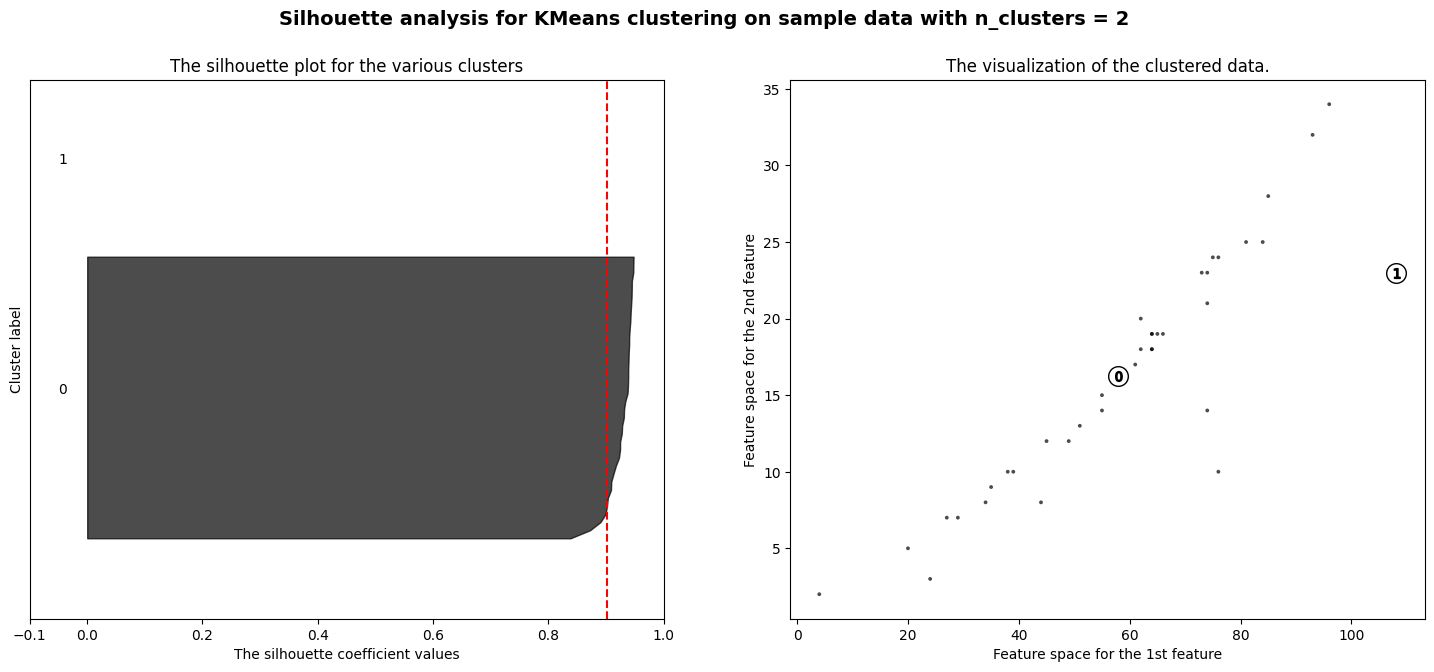

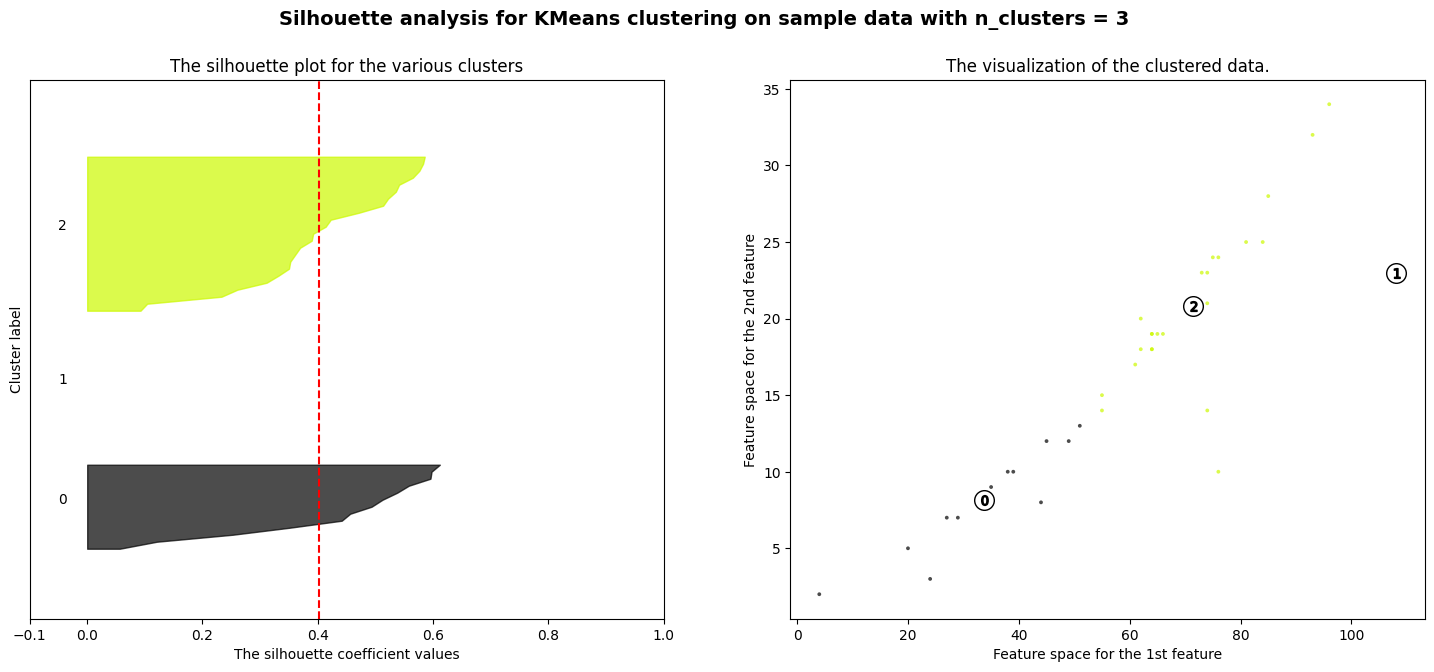

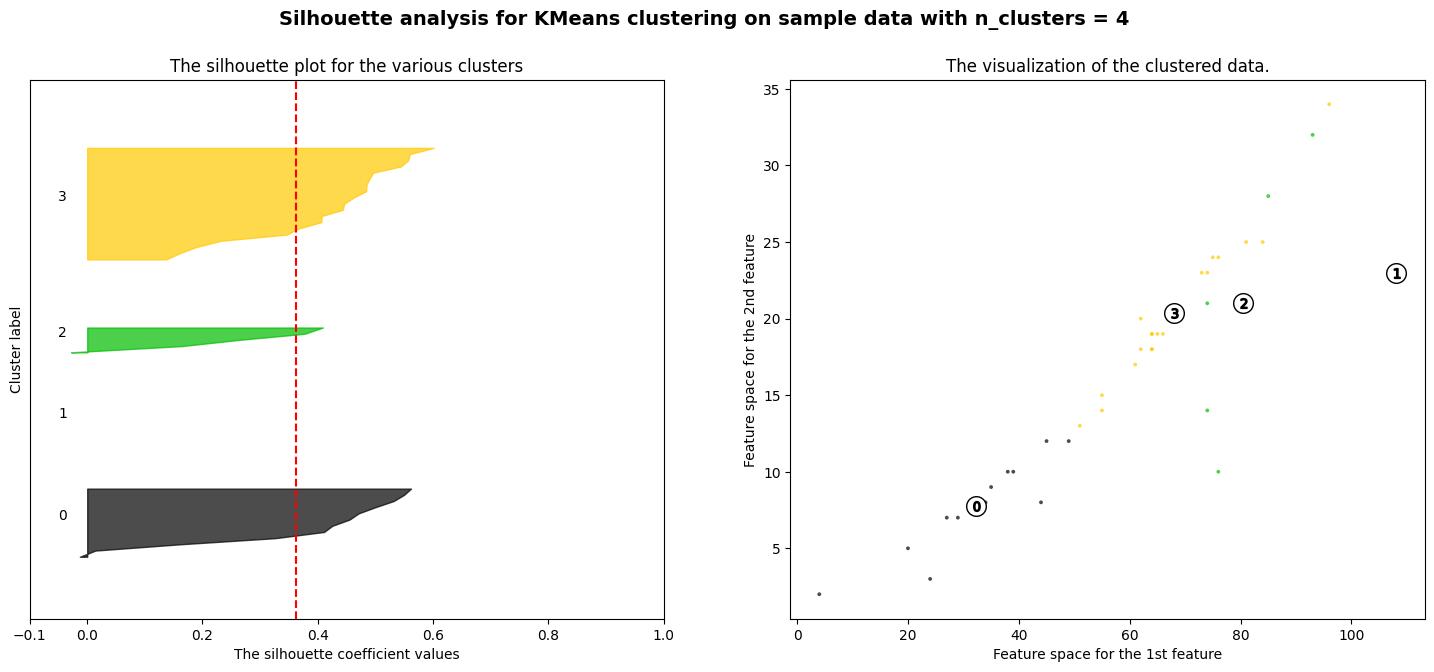

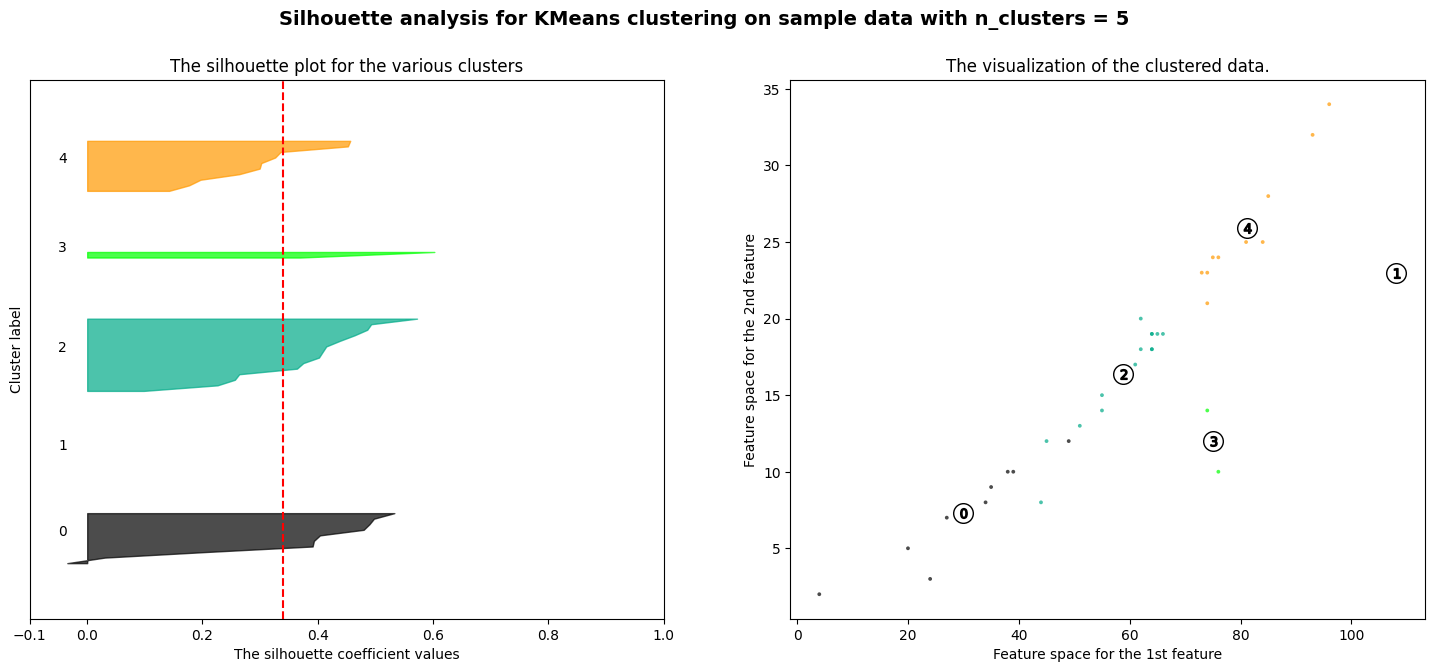

In [51]:
X = values
range_n_clusters = np.arange(2, 6)
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [52]:
rng = np.random.default_rng()

kmeans = KMeans(n_clusters=3)
X = rng.choice(values, 200, axis=0)
kmeans.fit(X)

KMeans(n_clusters=3)

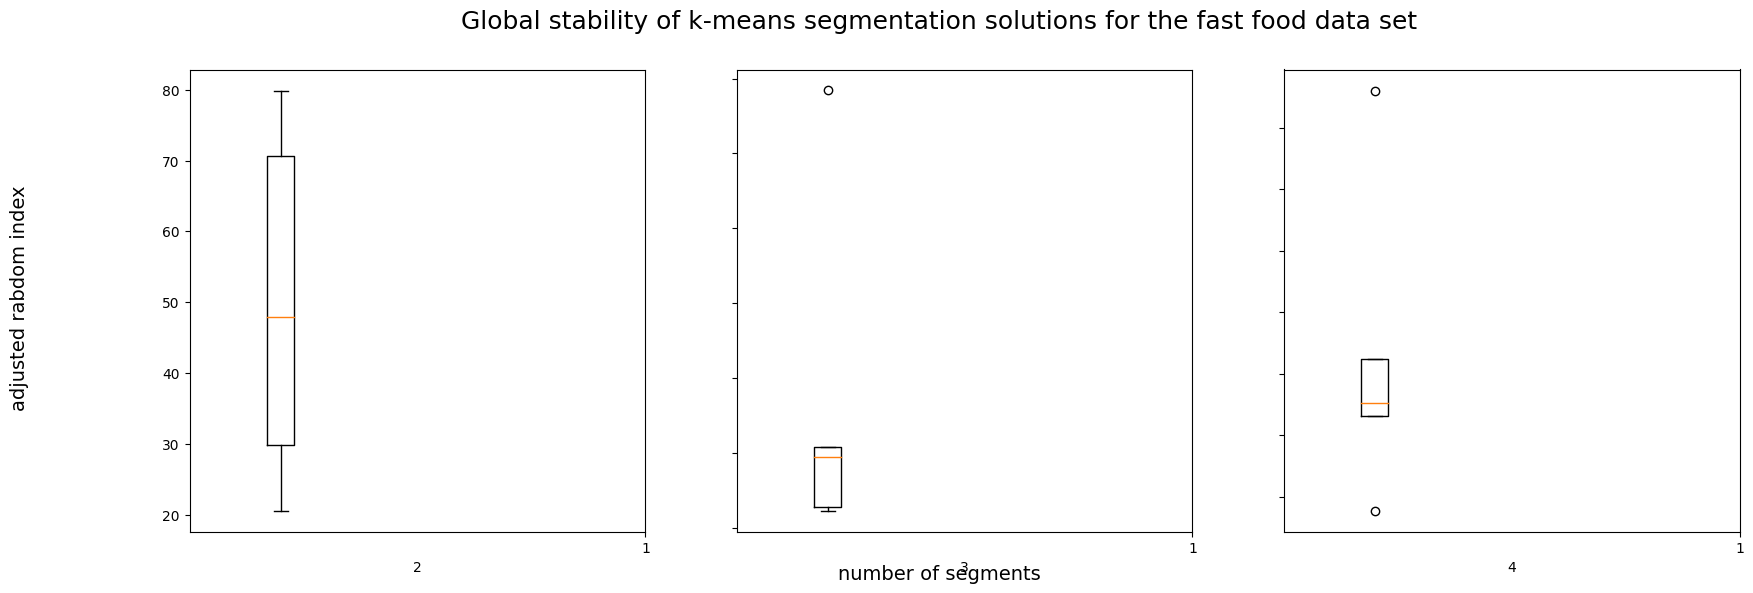

In [53]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,6))

fig.suptitle('Global stability of k-means segmentation solutions for the fast food data set', fontsize=18)

i=0

for ax in axes.flatten():
    ax.boxplot(kmeans.cluster_centers_[i])
    i+=1
    ax.label_outer()
    ax.set_xticks([i])
    ax.set_xlabel(i+1)

fig.text(0.5, 0.04, 'number of segments', va='center', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'adjusted rabdom index', va='center', ha='center', rotation='vertical', fontsize=14)

plt.show()

Mixtures of Regression Models

In [54]:

target = df['EV'].values

In [55]:
from sklearn.mixture import GaussianMixture
bic = []
aic = []

for k in range(2, 6):
    model = GaussianMixture(n_components=k, init_params='random')
    data = np.append(values, target.reshape(-1,1), axis=1)
    model.fit(data)
    print("For K : {} \t convergence after: {} iterations \n \n".format(k, model.n_iter_))

    bic.append(model.bic(data))
    aic.append(model.aic(data))

For K : 2 	 convergence after: 9 iterations 
 

For K : 3 	 convergence after: 7 iterations 
 

For K : 4 	 convergence after: 12 iterations 
 

For K : 5 	 convergence after: 16 iterations 
 



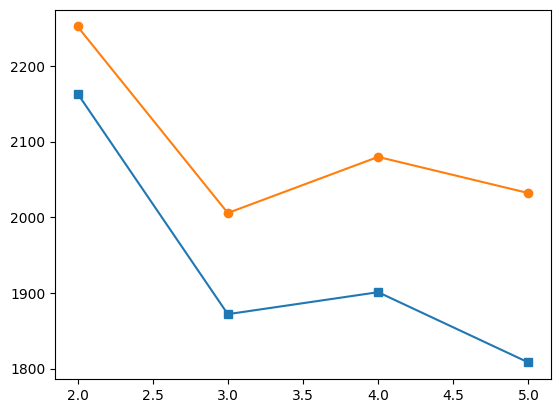

In [56]:

plt.plot(np.arange(2, 6), aic, marker = 's')
plt.plot(np.arange(2, 6), bic, marker = 'o')


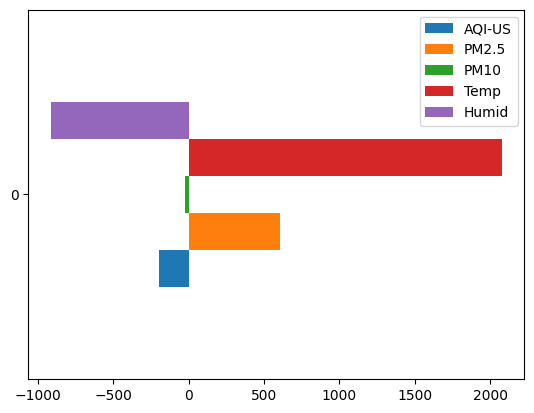

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr=lr.fit(values, target)

pd.DataFrame(lr.coef_.reshape(1,-1), columns=columns).plot(y=columns, kind='barh')
plt.show()


STEP-6

<Axes: xlabel='Temp', ylabel='EV'>

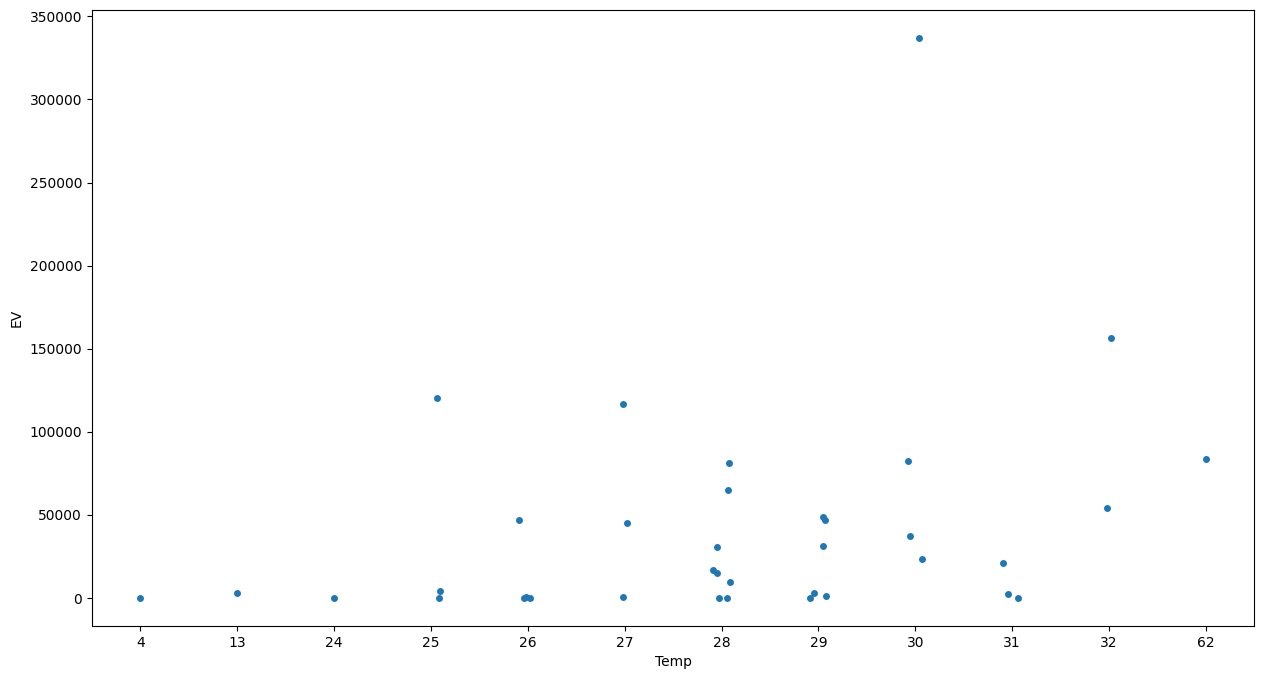

In [58]:
import seaborn as sb
ax=plt.subplots(figsize=(15,8))
sb.stripplot(x='Temp', y='EV', data=df, jitter=True)

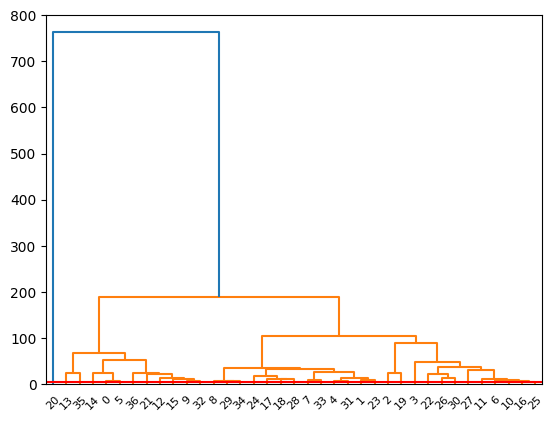

In [59]:
import scipy.cluster.hierarchy as shc
values = df[columns].values
dend = shc.dendrogram(shc.linkage(values, method='ward'))
plt.axhline(y = 5, color = 'r', linestyle = '-')
plt.show()

Number of clusters given by dendograms is 35

In [60]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(values)

array([2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2], dtype=int64)

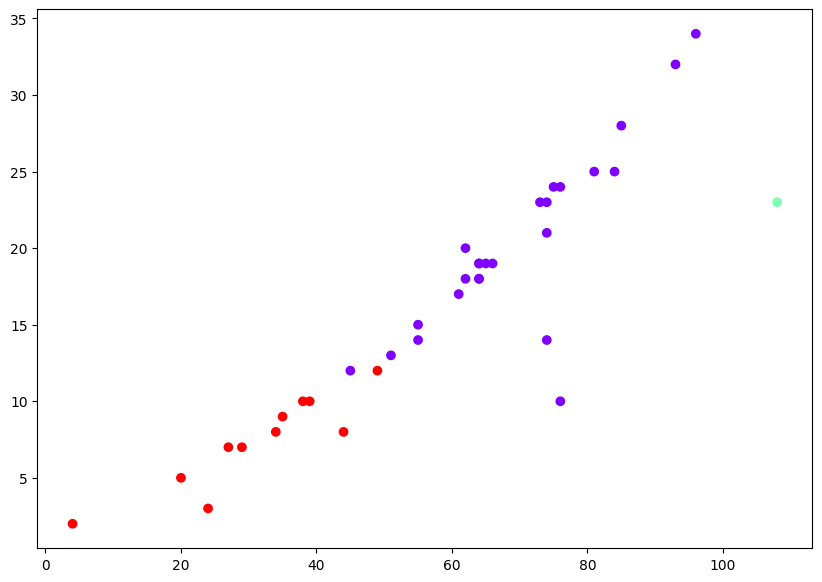

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(values[:,0], values[:,1], c=cluster.labels_, cmap='rainbow')


STEP-7

In [62]:
from statsmodels.graphics.mosaicplot import mosaic
kmeans = KMeans(3, random_state=0).fit(values)
crosstabLike = pd.crosstab(kmeans.labels_, target)

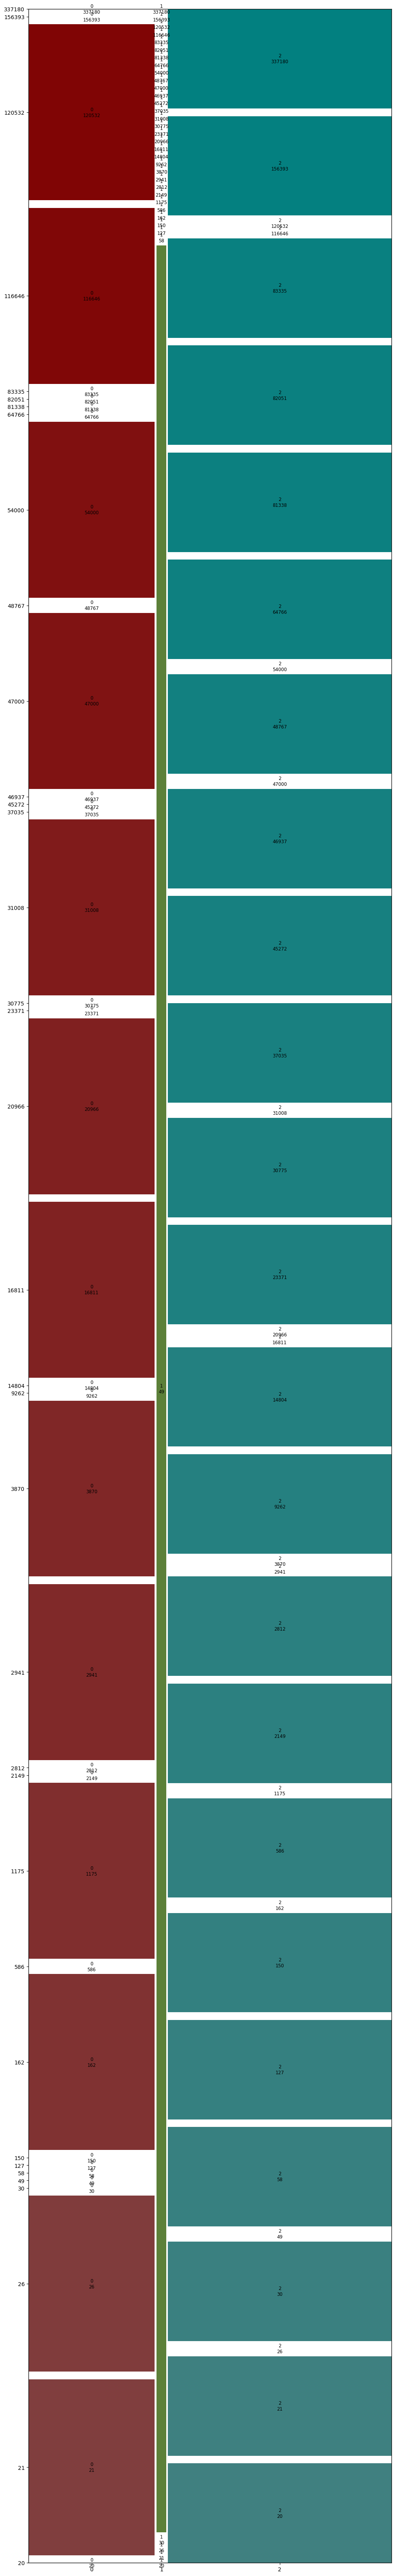

In [63]:

fig, ax = plt.subplots(figsize=(12, 85))
mosaic(crosstabLike.stack(), ax=ax)
plt.show()

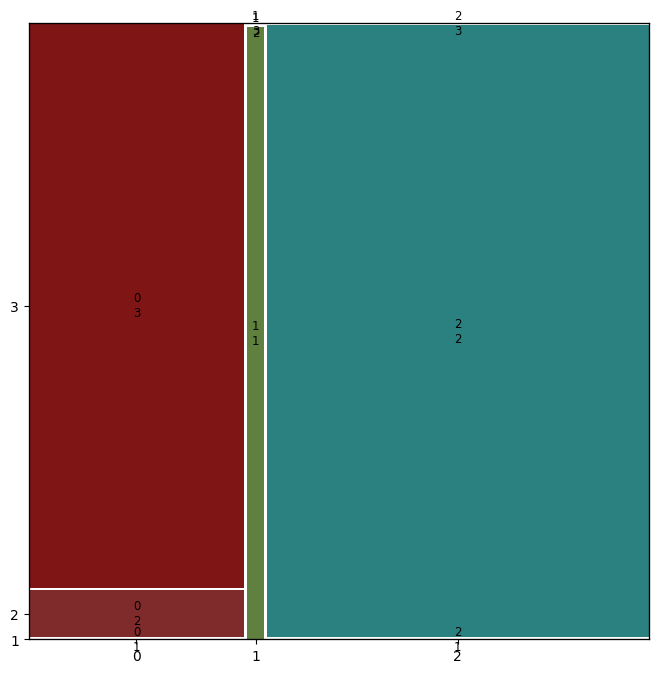

In [64]:
crosstabCondition = pd.crosstab(kmeans.labels_, df['status'])
fig, ax = plt.subplots(figsize=(8,8))
mosaic(crosstabCondition.stack(),ax=ax)
plt.show()


STEP-8

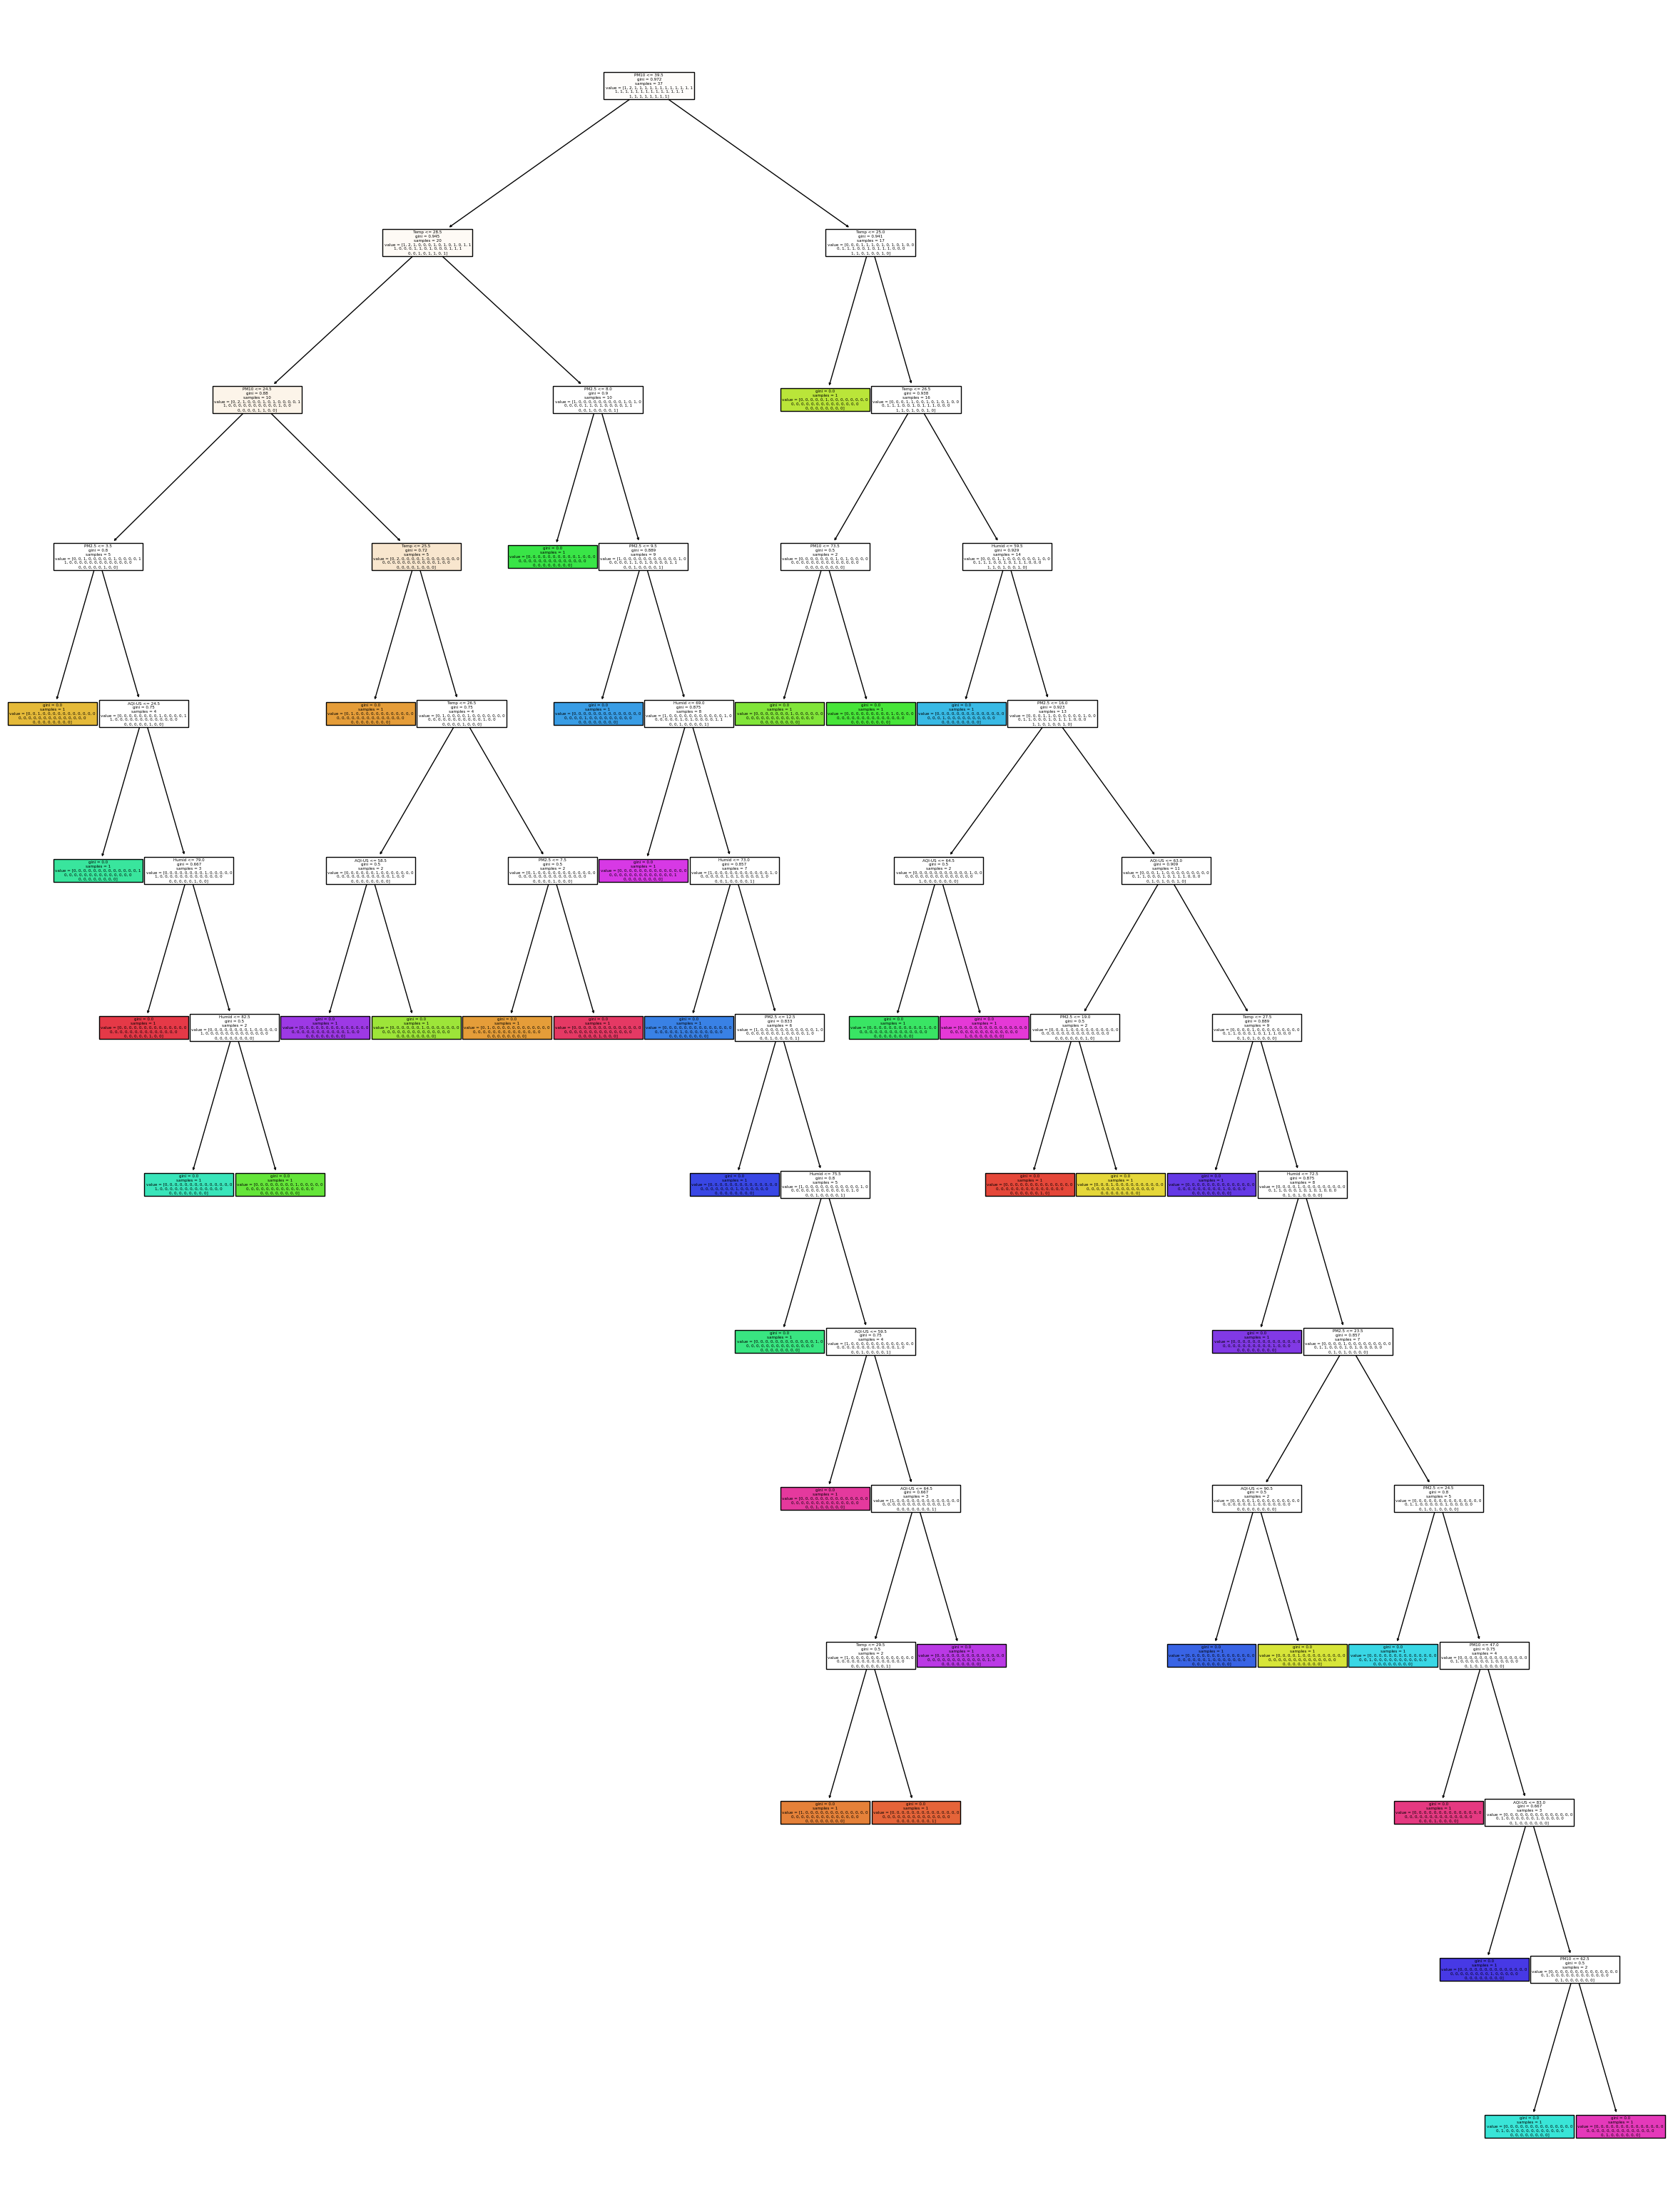

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtree = DecisionTreeClassifier()
dtree.fit(values, target)



fig = plt.figure(figsize=(30,40))
_ = plot_tree(dtree, 
                   feature_names=columns,  
                   filled=True)


In [66]:
df['KmeansLabels'] = kmeans.labels_


In [67]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
columns = df.columns[-4:-2].values
df[columns] = ordinal.fit_transform(df[columns])

In [68]:
a=df['status']
df['status'] = df['status'].replace('GOOD', 3)
df['status'] = df['status'].replace('MODERATE', 2)
df['status'] = df['status'].replace('POOR', 1)
Status = df.groupby('KmeansLabels')['status'].mean()
Status = Status.to_frame().reset_index()

EV = df.groupby('KmeansLabels')['EV'].mean()
EV = EV.to_frame().reset_index()


In [69]:
segmentEvalplot = EV.merge(Status, on='KmeansLabels', how='left')

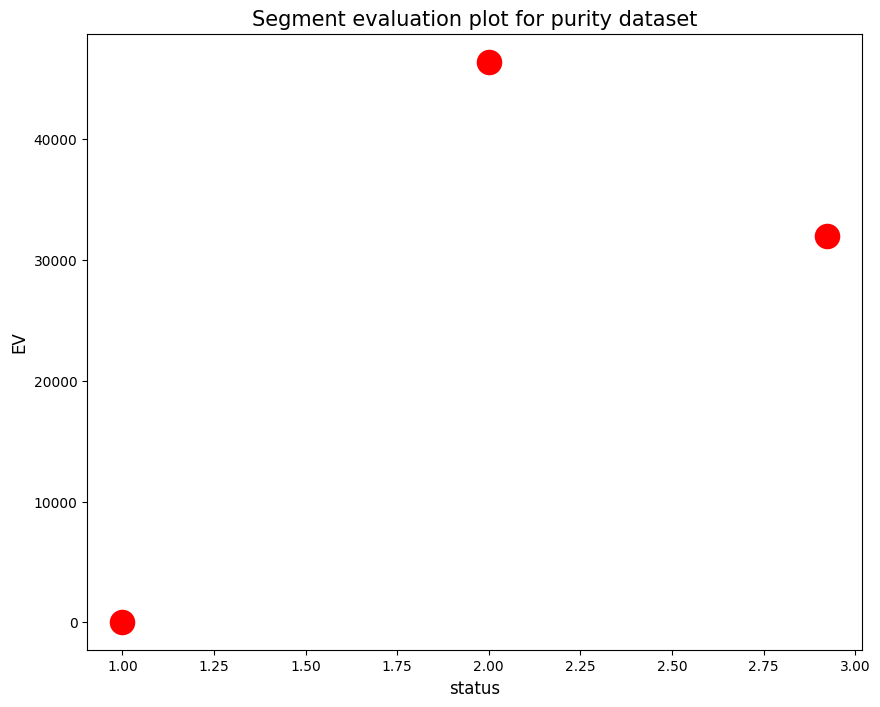

In [70]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = "status", y = "EV",data=segmentEvalplot,s=400, color="r")
plt.title("Segment evaluation plot for purity dataset", fontsize = 15) 
plt.xlabel("status", fontsize = 12) 
plt.ylabel("EV", fontsize = 12) 
plt.show()

In [71]:
# To Change back the encodings
df['status'] = df['status'].map(lambda x: ordinal.categories_[0][int(x)])
